# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [7]:
data = pd.read_csv("MODEL_DATA_final.csv",sep=";", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,CPL_meV,CPL_cm-1
0,ND3X0.0,-0.0004,-0.0002,3.0,0,0.0066,6.6,53.232564
1,ND3X0.2,-0.0004,0.5391,3.0,0,0.0063,6.3,50.812902
2,ND3X0.4,-0.0004,1.0784,3.0,0,0.0057,5.7,45.973578
3,ND3X0.6,-0.0004,1.6178,3.0,0,0.0049,4.9,39.521146
4,ND3X0.8,-0.0004,2.1571,3.0,0,0.0041,4.1,33.068714


Visualizing dataset dimensions

In [5]:
data.shape

(10584, 8)

Input features and output variable selection

In [4]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data["CPL_meV"].values

Splitting of the data into train set and test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

Scaling of input features

In [6]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [10]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

Number of epochs used for training

In [21]:
num_epochs = 500

Neural Network training

In [23]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0085 - val_loss: 0.0143
Epoch 2/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0081 - val_loss: 0.0104
Epoch 3/500
239/239 [==============================] - 1s 2ms/step - loss: 0.0843 - val_loss: 0.5718
Epoch 4/500
239/239 [==============================] - 1s 3ms/step - loss: 0.1776 - val_loss: 0.0315
Epoch 5/500
239/239 [==============================] - 1s 3ms/step - loss: 0.1191 - val_loss: 0.0249
Epoch 6/500
239/239 [==============================] - 1s 3ms/step - loss: 0.1025 - val_loss: 0.0156
Epoch 7/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0133 - val_loss: 0.0113
Epoch 8/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0080 - val_loss: 0.0098
Epoch 9/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0076 - val_loss: 0.0096
Epoch 10/500
239/239 [==============================] - 1s 2ms/step - loss: 0.0073 - val_lo

Epoch 161/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0335 - val_loss: 0.0259
Epoch 162/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0221 - val_loss: 0.0359
Epoch 163/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0174 - val_loss: 0.0138
Epoch 164/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0162 - val_loss: 0.0174
Epoch 165/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0189 - val_loss: 0.0295
Epoch 166/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0123
Epoch 167/500
239/239 [==============================] - 1s 2ms/step - loss: 0.1387 - val_loss: 0.0485
Epoch 168/500
239/239 [==============================] - 1s 2ms/step - loss: 0.0248 - val_loss: 0.0189
Epoch 169/500
239/239 [==============================] - 1s 2ms/step - loss: 0.0110 - val_loss: 0.0135
Epoch 170/500
239/239 [==============================] - 1s 3ms/step - lo

239/239 [==============================] - 1s 3ms/step - loss: 0.0262 - val_loss: 0.0172
Epoch 320/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0179
Epoch 321/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0108 - val_loss: 0.0148
Epoch 322/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0158
Epoch 323/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 324/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.1065
Epoch 325/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0420 - val_loss: 0.0732
Epoch 326/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0202 - val_loss: 0.0147
Epoch 327/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0113 - val_loss: 0.0165
Epoch 328/500
239/239 [==============================] - 1s 2ms/step - loss: 0.0109 - v

239/239 [==============================] - 1s 3ms/step - loss: 0.1203 - val_loss: 0.0178
Epoch 478/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0129 - val_loss: 0.0117
Epoch 479/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0095
Epoch 480/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0094 - val_loss: 0.0100
Epoch 481/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0072 - val_loss: 0.0088
Epoch 482/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 0.0107
Epoch 483/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0070 - val_loss: 0.0075
Epoch 484/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0069 - val_loss: 0.0114
Epoch 485/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0841 - val_loss: 0.0830
Epoch 486/500
239/239 [==============================] - 1s 3ms/step - loss: 0.0208 - v

# Model Evaluation

In [24]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 1ms/step - loss: 0.0123


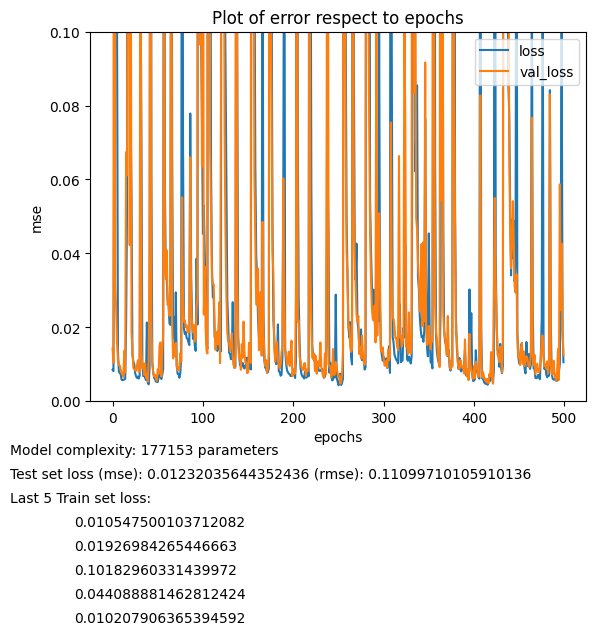

In [39]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [41]:
emp_test = np.array([-2.9219,3.009,4.4996,45])
emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [42]:
model.predict(emp_test)

1/1 [==============================] - 0s 20ms/step


array([[37.710503]], dtype=float32)

# Scatter plot

In [17]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [18]:
pred = predictions(X_test)

In [19]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.012161171384219446

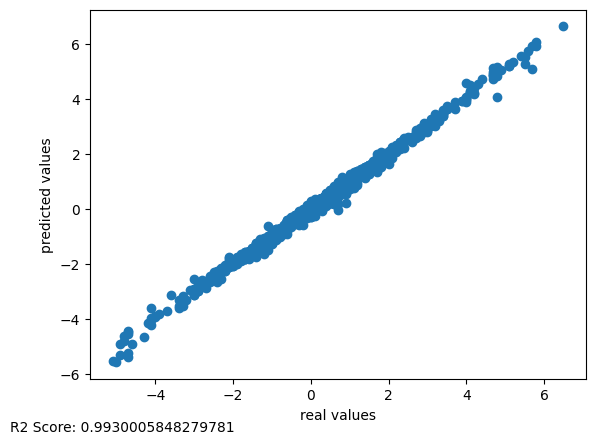

In [20]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [26]:
model.save('CPL_meV.h5')

In [29]:
from keras.models import load_model
model2 = load_model('CPL_meV.h5')

In [32]:
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model2.predict(k))) 
    return pred

In [33]:
pred = predictions(X_test)

In [34]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.012320350990509602

In [1]:
!pip install pandoc


[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
